In [13]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import warnings
from scipy.io.wavfile import write

In [ ]:
class cexp(object):
#This creates a discrete complex exponential with discrete frequency k and duration N

    def __init__(self, k, N):
        assert N > 0, "N must be greater than 0"
        self.k = k
        self.N = N

        self.n = np.arange(N)
        self.exp_kN = np.exp(2j*cmath.pi*self.k*self.n / self.N)
        self.exp_kN *= 1 / (np.sqrt(N))
        self.exp_kN_imag = self.exp_kN.imag
        self.exp_kN_real = self.exp_kN.real



def cexpt(f, T, fs):
    assert T > 0, "Duration of the signal must be greater than 0"
    assert fs != 0, "Sampling frequency cannot be zero"

    if fs < 0:
        warnings.warn("Sampling frequency is negative. Using the absolute value.")
        fs = - fs

    if f < 0:
        warnings.warn("Complex exponential frequency is negative. Using absolute value instead.")
        f = -f

    N = math.floor(T * fs)
    t = np.linspace(0, (N - 1) / fs, N)
    k = N * f / fs
    cpx_exp = cexp(k, N)
    x = cpx_exp.exp_kN
    x = np.sqrt(N) * x

    return t, x, N

In [ ]:
class sqpulse(object):

    def __init__(self, T0, T, fs):
        
        self.N=np.int(np.floor(T*fs))
        self.M=np.int(np.floor(T0*fs))
        self.pulse=np.concatenate((np.ones(self.M),np.zeros(self.N-self.M)))
        self.pulse*=1/np.sqrt(self.M)
        self.t=np.arange(0,T,1/fs)

class tripulse(object):

    def __init__(self, T0, T, fs):
        self.N=np.int(np.floor(T*fs))
        self.M=np.int(np.floor(T0*fs))

        ascending = np.arange(0,np.ceil(T0/2*fs))
        descending = np.arange(np.ceil(T0/2*fs)-1,0,-1)

        self.pulse=np.concatenate((ascending,descending,np.zeros(self.N-len(ascending)-len(descending))))
        self.pulse*=1/np.linalg.norm(self.pulse)
        self.t=np.arange(0,T,1/fs)


class kaiser_window(object):

    def __init__(self, beta, T, fs):
        self.N = np.int(np.floor(T * fs))
        self.signal=np.kaiser(self.N,beta)
        self.signal *= 1 / np.linalg.norm(self.signal)
        self.t = np.arange(0, T, 1 / fs)

In [14]:
#Question 1.1
class dft():
    def __init__(self, x, fs, K=None):
        if (type(fs) != int) or (fs<=0):
            raise NameError('The frequency fs must be a positive integer.')
        if not isinstance(x, np. ndarray):
            raise NameError('The input signal x must be a numpy array.')
        if isinstance(x, np. ndarray):
            if x.ndim!=1:
                raise NameError('The input signal x must be a numpy array.')
        self.x=x
        self.fs=fs
        self.N=len(x)
        if K == None:
            K = len(self.x)
            
        if (type(K) != int) or (K <= 0):
            raise NameError('K must be a positive integer.')
        self.K=K
        self.f=np.arange(self.K)*fs/self.K 
        self.f_c=np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*fs/self.K

    def changeK(self,K):
        if (type(K) != int) or (K <= 0):
            raise NameError('K must be a positive integer.')
        old_K=self.K
        self.K=K
        self.f=np.arange(self.K)*self.fs/self.K
        self.f_c=np.arange(-np.ceil(K/2)+1,np.floor(self.K/2)+1)*self.fs/self.K
        print('The value of K was succefully changed from %d to %d'%(old_K,self.K))
        
    def solve(self):
        X=np.fft.fft(self.x,self.K)/np.sqrt(self.N);
        X_c=np.roll(X,int(np.ceil(self.K/2-1)))
        return [self.f,X,self.f_c,X_c]

In [15]:
def energy(f, X,  interval):
    aux=0
    for i,freq in enumerate(f):
        if freq>=interval[0] and freq<=interval[1]:
            aux=aux+abs(X[i]*np.conjugate(X[i]))
    return aux

In [16]:
def dft_energy(T, fs, T0s):
    
    for T0 in T0s:

        sqpulse_signal = discrete_signal.sqpulse(T0, T, fs)
        sqpulse_dft = dft(sqpulse_signal.pulse, fs)
        [freqs,X,f_c,X_c]=sqpulse_dft.solve()

        Total_ener=np.sum(abs(X_c)**2)
        Partial_ener = abs(energy(f_c, X_c, [-1 / T0, 1 / T0]))
        print('Energy fraction of a square pulse of T0=%3.2f is %5.4f'%(T0, Partial_ener/Total_ener))

        fig, axs = plt.subplots(2)
        axs[0].grid()
        axs[1].grid()
        fig.suptitle('Square Pulse of Width %3.2fs '%(T0))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
        axs[0].plot(sqpulse_signal.t, sqpulse_signal.pulse)
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Signal')
        axs[1].plot(f_c,abs(X_c))
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('DFT')
        plt.show()
   

Energy fraction of a square pulse of T0=0.50 is 0.9244


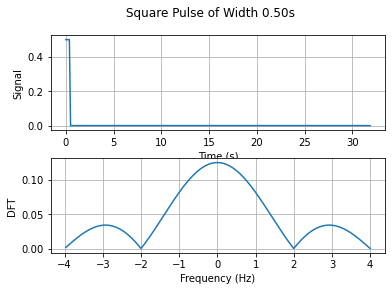

Energy fraction of a square pulse of T0=1.00 is 0.9081


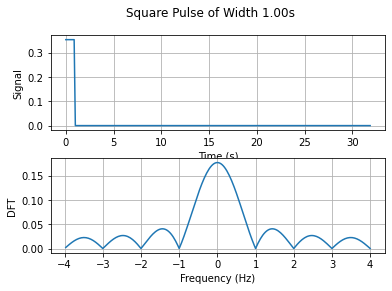

Energy fraction of a square pulse of T0=4.00 is 0.9032


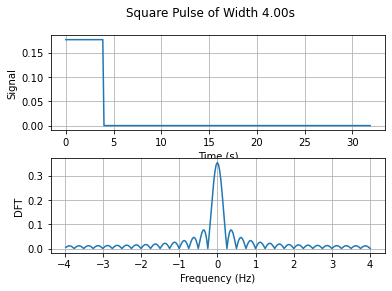

Energy fraction of a square pulse of T0=16.00 is 0.9053


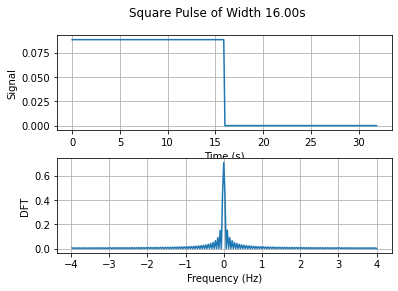

In [17]:
#Problem 1.2 Pulses widths
T0s = [0.5, 1, 4, 16]
duration_of_signal = 32
sampling_frequency = 8
dft_energy(duration_of_signal, sampling_frequency, T0s)

In [27]:
def dft_tripulse(T, fs, T0s):
        for T0 in T0s:

            tripulse_signal = tripulse(T0, T, fs)
            tripulse_dft = dft(tripulse_signal.pulse, fs)
            [freqs,X,f_c,X_c]=tripulse_dft.solve()

            Total_ener=np.sum(abs(X_c)**2)
            Partial_ener = abs(energy(f_c, X_c, [-1 / T0, 1 / T0]))
            print('Energy fraction of a triangular pulse of T0=%3.2f is %5.4f'%(T0, Partial_ener/Total_ener))

            fig, axs = plt.subplots(2)
            axs[0].grid()
            axs[1].grid()
            fig.suptitle('Triangular Pulse of Width %3.2fs '%(T0))
            fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
            axs[0].plot(tripulse_signal.t, tripulse_signal.pulse)
            axs[0].set_xlabel('Time (s)')
            axs[0].set_ylabel('Signal')
            axs[1].plot(f_c,abs(X_c))
            axs[1].set_xlabel('Frequency (Hz)')
            axs[1].set_ylabel('DFT')
            plt.show()

Energy fraction of a triangular pulse of T0=0.50 is 0.8222


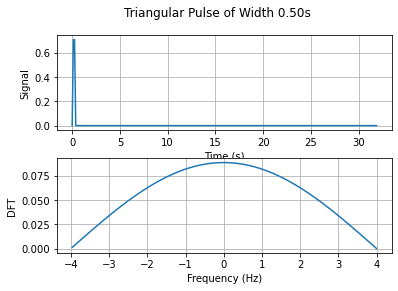

Energy fraction of a triangular pulse of T0=1.00 is 0.9124


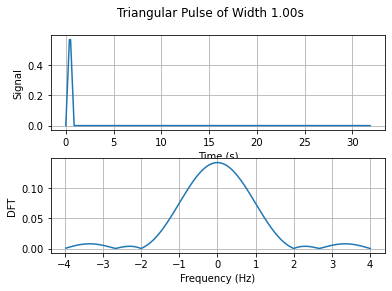

Energy fraction of a triangular pulse of T0=4.00 is 0.9571


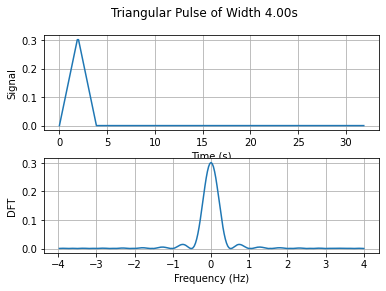

Energy fraction of a triangular pulse of T0=16.00 is 0.9904


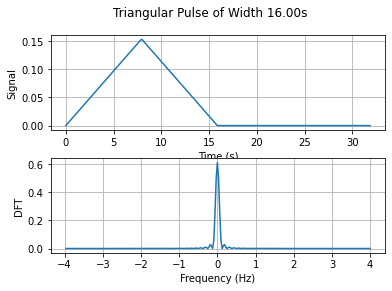

In [28]:
 # Problem 1.3 Pulses widths
 T0s = [0.5, 1, 4, 16]
 duration_of_signal = 32
 sampling_frequency = 8
 dft_tripulse(duration_of_signal, sampling_frequency, T0s)

In [29]:
def dft_kaiser(T, fs, params):
    
    kaiser_signal = kaiser_window(params[0], T, fs)
    kaiser_dft = dft(kaiser_signal.signal, fs)
    [freqs,X,f_c,X_c]=kaiser_dft.solve()

    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Kaiser Window of Beta %3.2f '%(params[0]))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
    axs[0].plot(kaiser_signal.t, kaiser_signal.signal)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Signal')
    axs[1].plot(f_c,abs(X_c))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('DFT')
    plt.show()

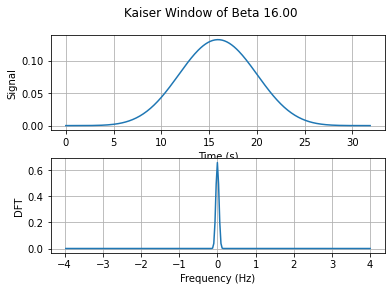

In [30]:
 #Problem 1.4 Dft of Kaiser Signal
 beta = 16
 params = [beta]
 duration_of_signal = 32
 sampling_frequency = 8
 dft_kaiser(duration_of_signal, sampling_frequency, params)

In [31]:
def A_note_dft(f0, T, fs):
    t, cpxexp, num_samples = cexp.cexpt(f0, T, fs)
    cos = np.real(cpxexp)
    Anote_dft = dft(cos, fs)
    [freqs, X, f_c, X_c] = Anote_dft.solve()

    print('The norm of the signal of an A note is',np.linalg.norm(abs(np.real(cpxexp)))**2)
    print('The norm of the DFT of an A note is',np.linalg.norm(abs(X_c))**2)

    plt.figure()
    plt.grid(True)
    plt.plot(f_c, abs(X_c))
    plt.xlim((-500,500))
    plt.title('DFT of an A note')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.show()

In [40]:
def dft_song(list_notes, list_times, fs):
    assert len(list_notes) == len(list_times),
    song = []
    for note, note_time in zip(list_notes, list_times):
        fi = 2**((note - 49) / 12)*440
        _, x, N = cexp.cexpt(fi, note_time, fs)
        song = np.append(song, x.real)
        song = np.append(song, np.zeros(10))

    Anote_dft = dft.dft(song, fs)
    [freqs, X, f_c, X_c] = Anote_dft.solve()


    plt.plot(f_c, abs(X_c))
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.title('DFT of YoruNiKakeru')

    plt.figure()
    plt.plot(f_c, abs(X_c))
    plt.xlim((-2000,2000))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.title('DFT of YoruNiKakeru')
    plt.show()
    return song,f_c, X_c

The norm of the signal of an A note is 7999.999999999998
The norm of the DFT of an A note is 7999.999999999998


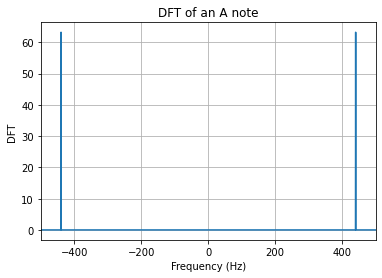

In [41]:
# Problem 3.2
f0 = 440
T = 2
fs = 44100
fs = 8000
A_note_dft(f0, T, fs)


In [46]:
def energy_song(song, f_c, X_c,notes_freq, notes_repetitions, notes):
    
    fig, axs = plt.subplots(2)
    axs[0].grid()
    axs[1].grid()
    fig.suptitle('Energy per note of YoruNiKakeru')
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

    ener_X_c=[abs(X_c[i])**2 for i in range(len(X_c))]

    axs[0].plot(f_c, ener_X_c)
    axs[0].set_xlim((0,2000))
    axs[0].set_xlabel('Frequency (Hz)')
    axs[0].set_ylabel('DFT')
    y_max=max(ener_X_c)*1.1
    axs[0].set_ylim((0, y_max))
    axs[1].bar(notes_freq,notes_repetitions, width=15)
    y_max = max(notes_repetitions) * 1.1
    axs[1].set_ylim((0, y_max))
    axs[1].set_xlim((0,2000))
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Number of time')
    plt.show()

In [53]:
def A_note_inst(f0, T, fs, instruments, instruments_name):
    
    for j,harmonic in enumerate(instruments):
        note=np.zeros(T*fs)
        for i,h in enumerate(harmonic):
            t, cpxexp, num_samples = cexp.cexpt(f0*(i+1), T, fs)
            note=note+h*np.real(cpxexp)


        Anote_dft = dft.dft(note, fs)
        [freqs, X, f_c, X_c] = Anote_dft.solve()

        total_energy=sum(abs(X_c)**2)
        energy_per_harmonic=[]
        for i,h in enumerate(harmonic):
            energy_per_harmonic=energy_per_harmonic+[energy(f_c, X_c, [-f0*(i+1),f0*(i+1)]) /total_energy]

        print(instruments_name[j],energy_per_harmonic)

        plt.figure()
        plt.grid(True)
        plt.title('A note in a(n) '+instruments_name[j])

        plt.plot(f_c, abs(X_c))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('DFT')
    plt.show()

In [54]:
def dft_flute(list_notes,list_times, fs, instrument, instrument_name):
    
    song = []
    for note, note_time in zip(list_notes, list_times):
        fi = 2**((note - 49) / 12)*440
        note = np.zeros(math.floor(note_time * fs))
        for i,h in enumerate(instrument):
            t, x, N = cexp.cexpt(fi*(i+1), note_time, fs)
            note=note+h*x

        song = np.append(song, x.real)

    write('YoruNiKakeru in'+instrument_name+'.wav', fs, song.astype(np.float32))
    song_dft = dft.dft(song, fs)
    [freqs, X, f_c, X_c] = song_dft.solve()

    plt.figure()
    plt.grid(True)
    plt.title('YoruNiKakeru on the '+instrument_name)
    plt.plot(f_c, abs(X_c))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('DFT')
    plt.show()

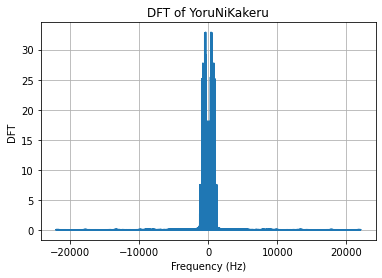

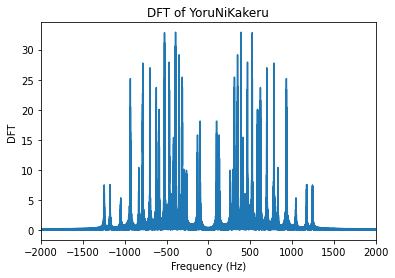

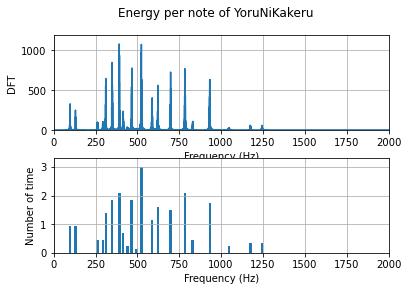

oboe [0.4809320437351149, 0.9508244083659817, 0.9832704899132991, 0.9866392744295084, 0.9894522695858793, 0.9995668848682341, 0.9999096216401344, 1.0]
flute [0.7575587780442434, 0.9135979559360782, 0.9945648519622564, 0.9978035278033035, 1.0]
trumpet [0.37576327963784806, 0.7586437426865734, 0.8616479694023196, 0.9580192405376223, 0.9906697160603884, 0.9960006368078818, 0.9982355344868163, 0.9991319767780334, 0.9994699705628107, 0.9997020136428088, 0.9998355556769575, 0.9999459209944358, 1.0]
clarinet [0.001723935038087949, 0.18444159052350176, 0.20916368070555047, 0.8336539361407378, 0.8523716731667486, 0.9022152171435415, 0.9132028127800071, 0.9156045540424225, 0.931632841217291, 0.9398281346568863, 0.9840643725960586, 0.9863998621222614, 0.9908493843221527, 0.9968704162369572, 0.9972081611019843, 0.9987134190806853, 0.9989376557263275, 0.9997549149058994, 1.0]


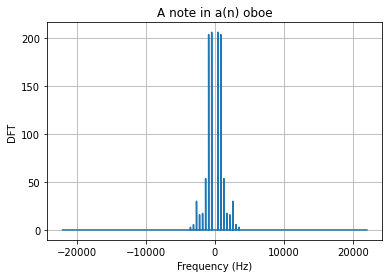

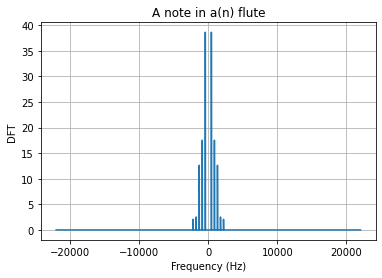

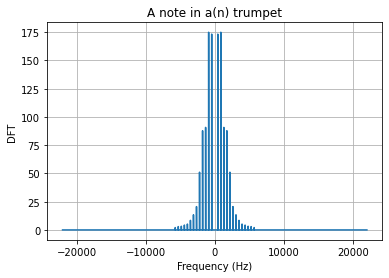

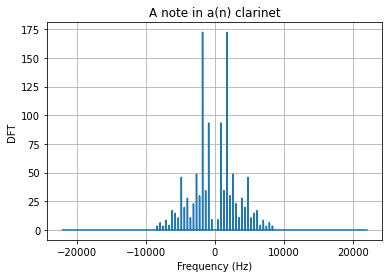

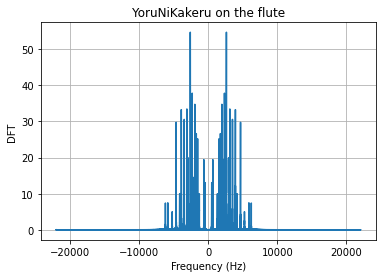

In [55]:
#Problem 3.3 mapping notes
G2=23
C3=28
C4=40
D4=42
D4S=43
E4=44
F4=45
G4=47
G4S=48
A4=49
A4S=50
B4=51
C5=52
D5=54
D5S=55
E5=56
F5=57
G5=59
G5S=60
A5=61
A5S=62
B5=63
C6=64
C6S=65
D6=66
D6S=67
E6=68
F6=69
F6S=70
G6=71
A6=73
B6=75


# Song
song_notes = [G4, A4, C5, G4S, G4, F4, D4S, F4, C5, A4S, C5, G4,
              F4, D4S, C4, D4S, F4, G4S, G4, G4, G5, F4, F5, G5, D4, D5, 
              D4S, D5S, D4, D5, A4S, C4, C5, A4S, G4, A4S, C5, G4S, G4, F4, 
              D5, C5, A4S, A4S, C5, D5, D5S, G4, F4, F4, D4S,
              C3, G2, C3, G2, C3, G2, C3, G2, A4S, C5, 
              D5S, A5S, C6, A5S, G5, C5, D5S, F5, G5, C5, D6S, D6, A5S, G5, A5S, C6, 
              A5S, G5, F5, C5, G5, F5, D5S, C5, B4, G5S, G5, D5, F5,
              D5S, A5S, G5S, G5, A4S, A4S, C5, D5S, A5S, G5, F5, D5S, C5, D5S, F5, 
              G5, C5, D6S, D6, A5S, G5, A5S]

beat=6/13
b = 1*beat
h = 0.5*beat
q = 0.25*beat

song_times = [h, h, h, h, h, h, h, h, h, h, q, h,
              h, b, h, h, h, h, h, h, h, h, h, h, h, h, 
              h, h, h, h, h, h, h, h, h, h, h, h, h, h, 
              h, h, h, h, h, h, h, b, h, h, h,
              q, q, b, b, h, h, q, q, q, q,
              q, q, q, h, q, h, h, h, h, q, q, q, q, q, h, q,
              h, h, h, h, h, h, q, h, q, h, h, h, h,
              h, h, h, q, q, h, h, h, h, q, q, q, q, q, h, 
              q, h, h, h, h, q, q]


song,f_c, X_c=q_32(song_notes, song_times, fs)

notes = [G2, C3, C4, D4, D4S, E4, F4, G4, G4S, A4, A4S, B4, C5, D5, D5S, E5, F5, G5,
    G5S, A5, A5S, B5, C6, C6S, D6, D6S, E6, F6, F6S, G6, A6, B6]
notes_freq = [2 ** ((note - 49) / 12) * 440 for note in notes]

notes_repetitions=[0 for i in range(len(notes))]
for i,note in enumerate(song_notes):
    notes_repetitions[notes.index(int(note))]=notes_repetitions[notes.index(int(note))]+song_times[i]

energy_song(song, f_c, X_c, notes_freq,notes_repetitions,notes)

oboe=[1.386, 1.370, 0.360, 0.116, 0.106, 0.201, 0.037, 0.019]
flute=[0.260, 0.118, 0.085, 0.017, 0.014]
trumpet=[1.167, 1.178, 0.611, 0.591, 0.344, 0.139,
            0.090, 0.057, 0.035, 0.029, 0.022, 0.020, 0.014]
clarinet=[0.061, 0.628, 0.231, 1.161, 0.201, 0.328, 0.154, 0.072, 0.186, 0.133,
            0.309, 0.071, 0.098, 0.114, 0.027, 0.057, 0.022, 0.042, 0.023]

f0 = 440
T = 2
fs = 44100
A_note_inst(f0,T,fs,[oboe,flute,trumpet,clarinet],['oboe','flute','trumpet','clarinet'])

dft_flute(song_notes, song_times,  fs, flute, 'flute')